In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

data = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
study_data = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv')

<h1 style="font-size:40px">Contents</h1>

<table style="font-size: 20px">
    <tr>
        <th style="float: left">1. Describing the data</th>
    </tr>
    <tr>
        <th style="float: left">2. Filling in missing values</th>
    </tr>
    <tr>
        <th style="float: left">3. Distribution of the variables</th>
    </tr>
    <tr>
        <th style="float: left">4. Correlation of the variables</th>
    </tr>
    <tr>
        <th style="float: left">5. Extreme values of the variables</th>
    </tr>
    <tr>
        <th style="float: left">6. Creating classifier for gender prediction</th>
    </tr>
</table>

<h1 style="font-size:40px">Describing the data</h1>

<img src="https://previews.123rf.com/images/aomeditor/aomeditor1903/aomeditor190300021/122254680-illustrator-of-body-parts-of-penguin.jpg" height='600px' width='400px'>

### <b>Columns in the dataset</b>
<ul>
    <li><b>Species: </b>penguin species (Chinstrap, Adélie, or Gentoo)</li>
    <li><b>Island: </b>island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)</li>
    <li><b>culmen_length_mm: </b>culmen length (mm)</li>
    <li><b>culmen_depth_mm: </b>culmen depth (mm)</li>
    <li><b>flipper_length_mm: </b>flipper length (mm)</li>
    <li><b>body_mass_g: </b>body mass (g)</li>
    <li><b>Sex: </b>penguin sex</li>
</ul>

### What is culmen?

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

## Various observations of the data

In [2]:
# description

data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [3]:
#Covariance

data.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [4]:
#correlation

data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Number of entries in data for each species

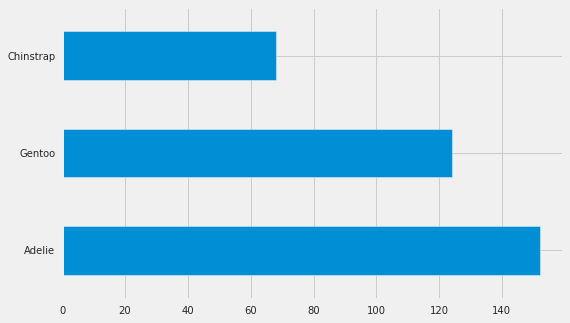

In [5]:
data['species'].value_counts().plot(kind='barh')
plt.show()

It can be observed that unlike the Iris dataset, this data contains different number of entries for each species

<h1 style="font-size:40px">Filling in missing values</h1>

In [6]:
#checking number of null values in the data
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
# Dropping the 2 rows with null values for all variables

data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [8]:
#imputing the null values in sex with its mode

data['sex'] = data['sex'].fillna('MALE')

In [9]:
#dropping the 336th row due to its faulty value in sex variable

data.drop(data[data['sex']=='.'].index, inplace=True)

<h1 style="font-size:40px">Distribution of the variables</h1>

Culmen Length Distribution


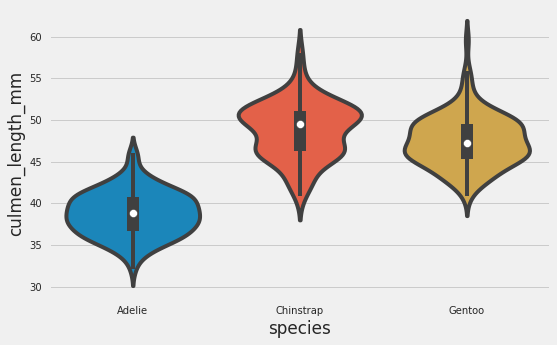

In [10]:
print('Culmen Length Distribution')
sns.violinplot(data=data, x="species", y="culmen_length_mm", size=8)
plt.show()

Culmen Depth Distribution


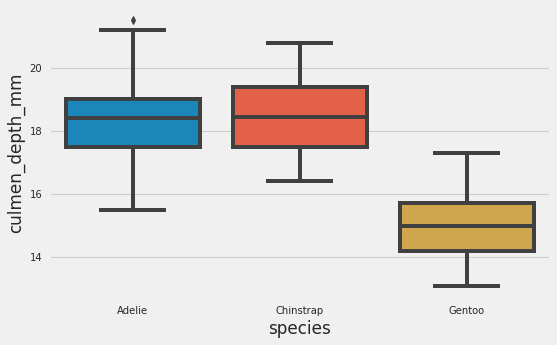

In [11]:
print('Culmen Depth Distribution')
sns.boxplot(data=data, x="species", y="culmen_depth_mm")
plt.show()

Flipper Length Distribution


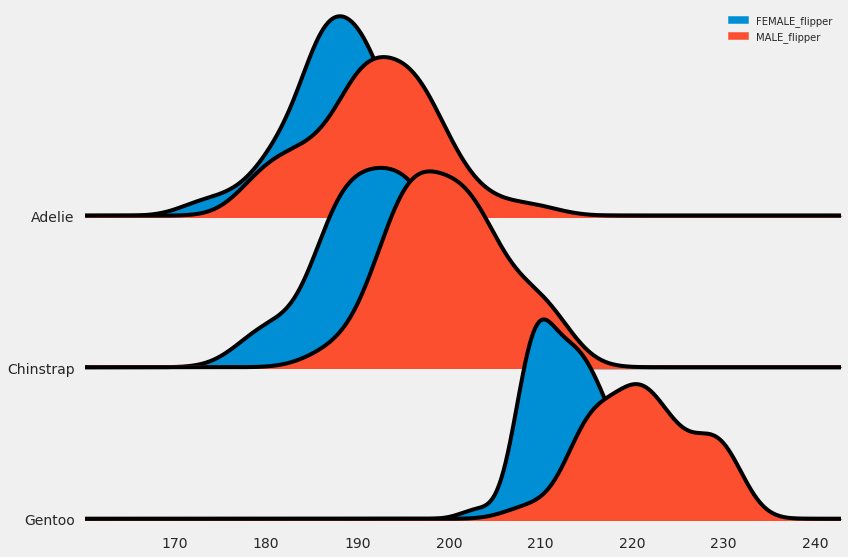

In [12]:
print('Flipper Length Distribution')
df = data.copy()
df["MALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "MALE" else np.nan, axis = 1)
df["FEMALE_flipper"] = df.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "FEMALE" else np.nan, axis = 1)
fig, axes = joypy.joyplot(df, 
                          column=['FEMALE_flipper', 'MALE_flipper'],
                          by = "species",
                          ylim = 'own',
                          figsize = (12,8), 
                          legend = True
                         )

Body Mass Distribution


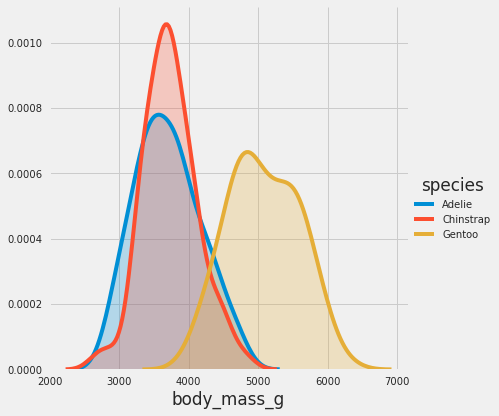

In [13]:
print('Body Mass Distribution')
sns.FacetGrid(data, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

<h1 style="font-size:40px">Correlation of the variables</h1>

culmen_length vs culmen_depth


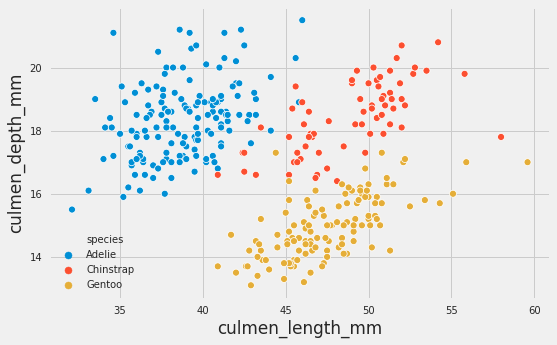

In [14]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

culmen_length vs flipper_length


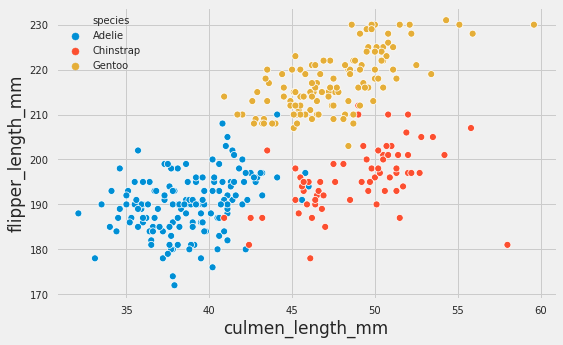

In [15]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs flipper_length


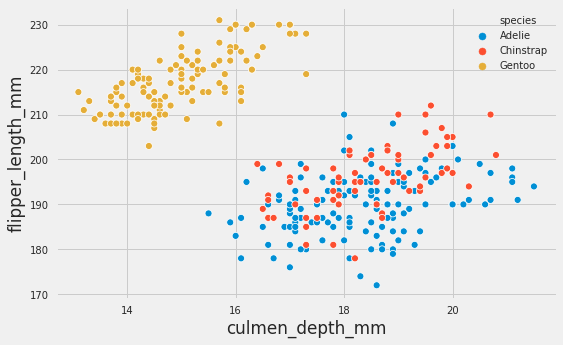

In [16]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=data, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs body_mass


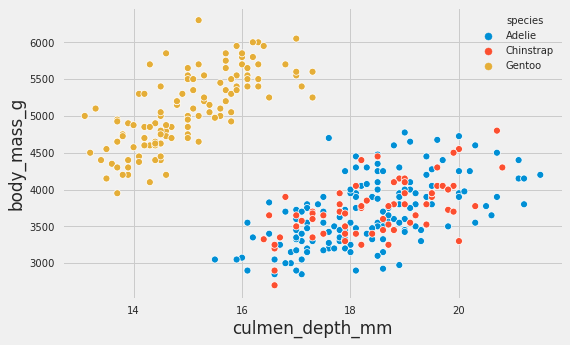

In [17]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs body_mass


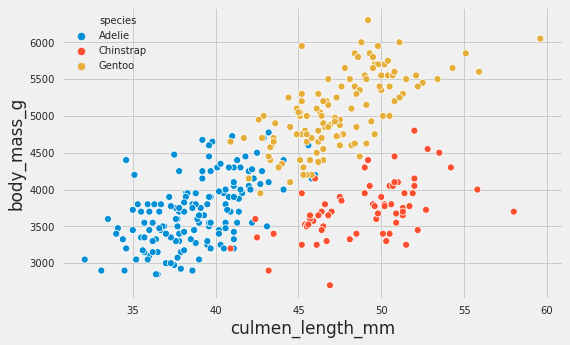

In [18]:
print('culmen_length vs body_mass')
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()

flipper_length vs body_mass


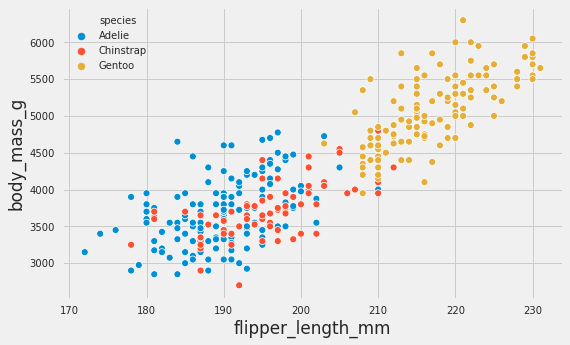

In [19]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

Pairplot


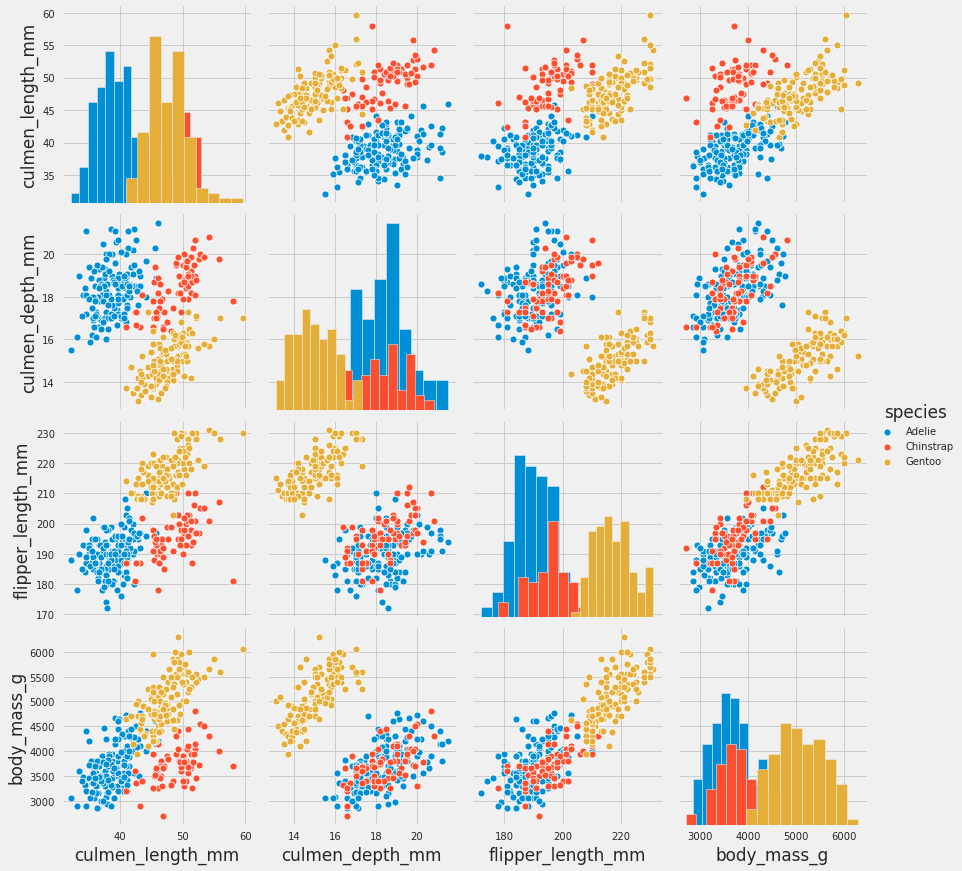

In [20]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

<h1 style="font-size:40px">Extreme values of the variables</h1>

Which island consists of most Penguins?
Answer: Biscoe


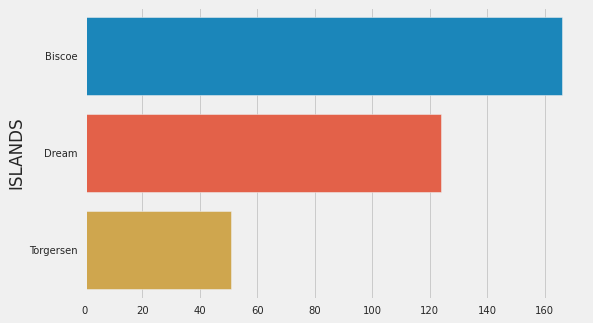

In [21]:
print('Which island consists of most Penguins?')
print('Answer: Biscoe')
df = data['island'].value_counts().reset_index()

fig = sns.barplot(data=df, x='island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()

Which species have highest culmen_length?
Answer: Chinstrap(male and female)


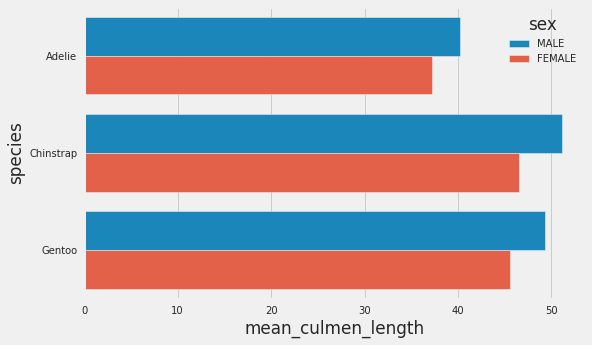

In [22]:
print('Which species have highest culmen_length?')
print('Answer: Chinstrap(male and female)')
df = data.loc[:,['species','culmen_length_mm','sex']]
df['mean_culmen_length'] = df.groupby(['species','sex'])['culmen_length_mm'].transform('mean')
df = df.drop('culmen_length_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_culmen_length', y='species', hue='sex')
plt.show()

Which species have highest culmen_depth?
Answer: Chinstrap(male and female)


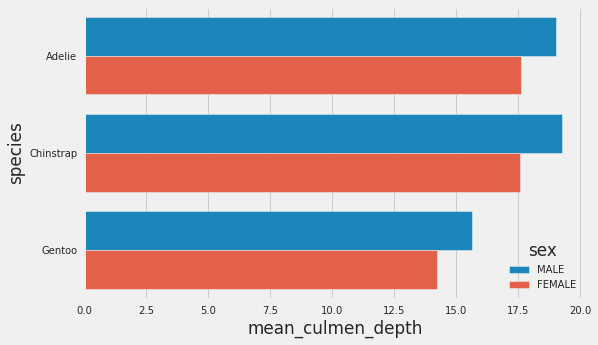

In [23]:
print('Which species have highest culmen_depth?')
print('Answer: Chinstrap(male and female)')
df = data.loc[:,['species','culmen_depth_mm','sex']]
df['mean_culmen_depth'] = df.groupby(['species','sex'])['culmen_depth_mm'].transform('mean')
df = df.drop('culmen_depth_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_culmen_depth', y='species', hue='sex')
plt.show()

Which species have highest flipper_length?
Answer: Gentoo(male and female)


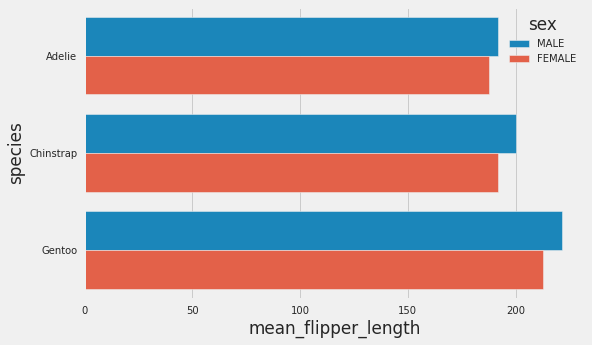

In [24]:
print('Which species have highest flipper_length?')
print('Answer: Gentoo(male and female)')
df = data.loc[:,['species','flipper_length_mm','sex']]
df['mean_flipper_length'] = df.groupby(['species','sex'])['flipper_length_mm'].transform('mean')
df = df.drop('flipper_length_mm', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_flipper_length', y='species', hue='sex')
plt.show()

Which species have highest body_mass?
Answer: Gentoo(male and female) - Highly diverse values noticed


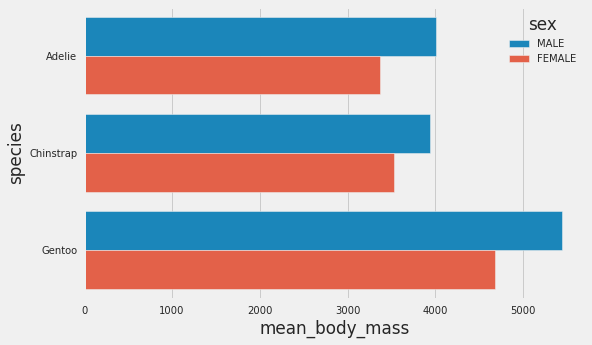

In [25]:
print('Which species have highest body_mass?')
print('Answer: Gentoo(male and female) - Highly diverse values noticed')
df = data.loc[:,['species','body_mass_g','sex']]
df['mean_body_mass'] = df.groupby(['species','sex'])['body_mass_g'].transform('mean')
df = df.drop('body_mass_g', axis=1).drop_duplicates()

sns.barplot(data=df, x='mean_body_mass', y='species', hue='sex')
plt.show()

<h1 style="font-size:40px">Creating classifier for gender prediction</h1>

Since the missing values are already we don't need to worry about that. Next step is to encode the categorical variables.

I am setting 'sex' as the target variable. So the categorical variables to be encoded are 'species' and 'island'

In [26]:
df = data.copy()
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

Lets label encode the target variable as well. 

I won't be using any fit transform from the scikit learn api rather i will be using a primitive mapping.

In [27]:
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df['sex'] = df['sex'].apply(target_encode)

In [28]:
#separating X and y

X = df.drop('sex', axis=1)
y = df['sex']

In [29]:
# scaling the data

from sklearn import preprocessing
X = preprocessing.scale(X)

In [30]:
#splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [31]:
# model fitting and prediction

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [32]:
# checking performance of model

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print('CONFUSION MATRIX')
print(confusion_matrix(y_test, pred))

CONFUSION MATRIX
[[29  7]
 [ 1 32]]


In [33]:
print('CLASSIFICATION REPORT\n')
print(classification_report(y_test, pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        36
           1       0.82      0.97      0.89        33

    accuracy                           0.88        69
   macro avg       0.89      0.89      0.88        69
weighted avg       0.90      0.88      0.88        69



ROC CURVE


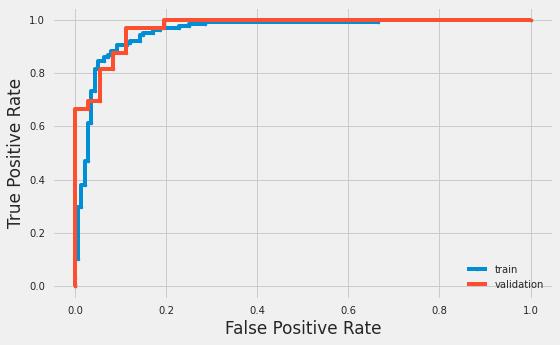

In [34]:
# ROC CURVE

print('ROC CURVE')
train_probs = model.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = model.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### So the model achieved an accuracy of 88%.

<h1 style="font-size:40px">Clustering the species</h1>

In [35]:
df = data.copy()

CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH


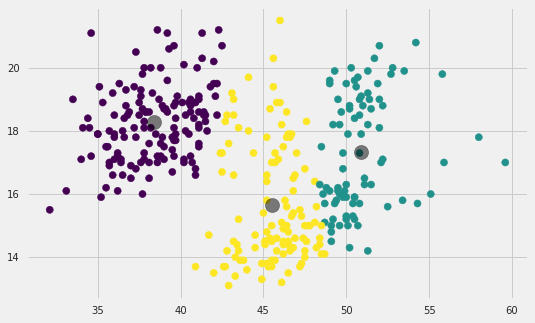

In [36]:
print('CLUSTERING ON CULMEN LENGTH AND CULMEN DEPTH')
X = df[['culmen_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH


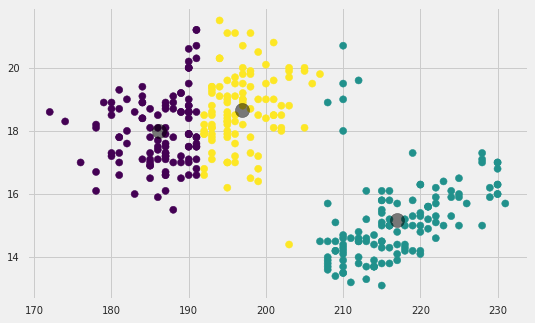

In [37]:
print('CLUSTERING ON FLIPPER LENGTH AND CULMEN DEPTH')
X = df[['flipper_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

CLUSTERING ON FLIPPER LENGTH AND BODY MASS


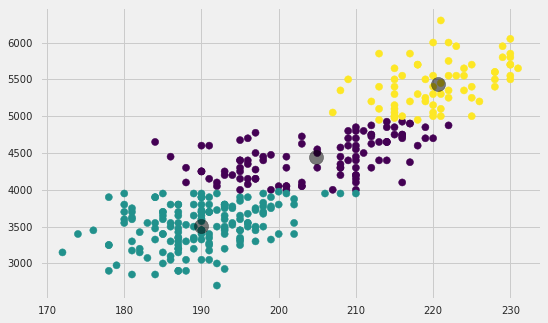

In [38]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = df[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()